##### Jueves 10 de Abril de 2025
##### Gomez Trejo Ezequiel

## Agrupación de países por indicadores económicos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### 1. Importar CSV

In [41]:
df = pd.read_csv('winequality-red.csv')

#### Exploración de Datos

In [42]:
print("\nPrimeras 5 filas: ")
print(df.head())


Primeras 5 filas: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


In [43]:
print("\nValores nulos: ")
print(df.isnull().sum())


Valores nulos: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [44]:
print("\nInformación del DataFrame: ")
print(df.info())


Información del DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [45]:
print("\nDescripción estadística: ")
print(df.describe())


Descripción estadística: 
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000   

In [46]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


#### 2. Visualización de Datos 

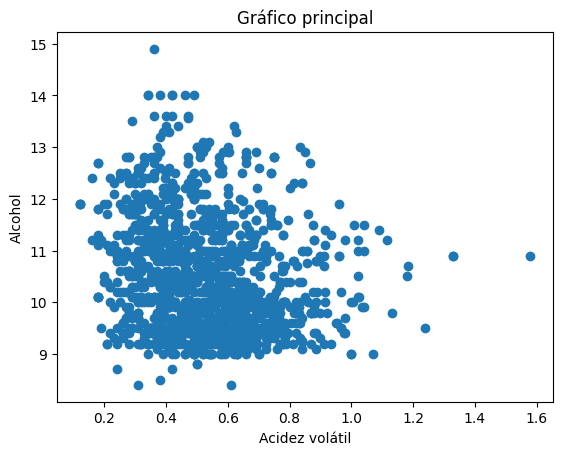

In [47]:
plt.scatter(df['volatile acidity'], df['alcohol'])
plt.title('Gráfico principal')
plt.xlabel('Acidez volátil')
plt.ylabel('Alcohol')
plt.show()

#### PREPROCESAMIENTO
#### 3. Selección de Variables

In [48]:
X = df[['volatile acidity', 'alcohol']]

#### 4. Normalización de datos

In [64]:
scaler = MinMaxScaler().fit(df[['volatile acidity', 'alcohol']])
X_scaled = scaler.transform(df[['volatile acidity', 'alcohol']])
print("\nPrimeros 5 Datos normalizados: ")
print(X_scaled[:5])


Primeros 5 Datos normalizados: 
[[0.39726027 0.15384615]
 [0.52054795 0.21538462]
 [0.43835616 0.21538462]
 [0.10958904 0.21538462]
 [0.39726027 0.15384615]]


#### 5. Determinación del número óptimo de clusters

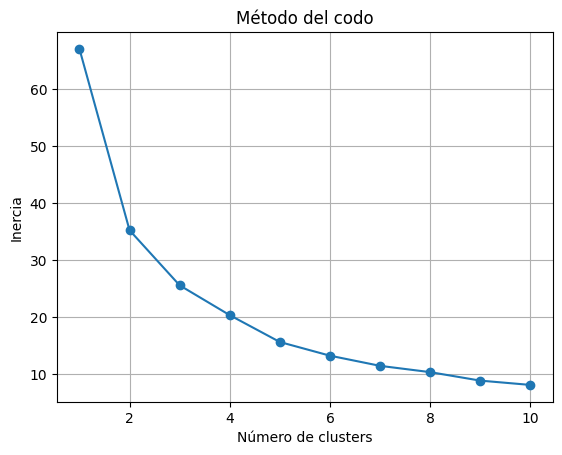

In [65]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')   
plt.grid()
plt.show()

#### 6. Aplicar KMeans con el número óptimo de clusters

In [66]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
print("\nPrimeras 5 filas con clusters: ")
print(df.head())


Primeras 5 filas con clusters: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Cluster  
0      9.4        5   

#### 7. Visualizar los clusters

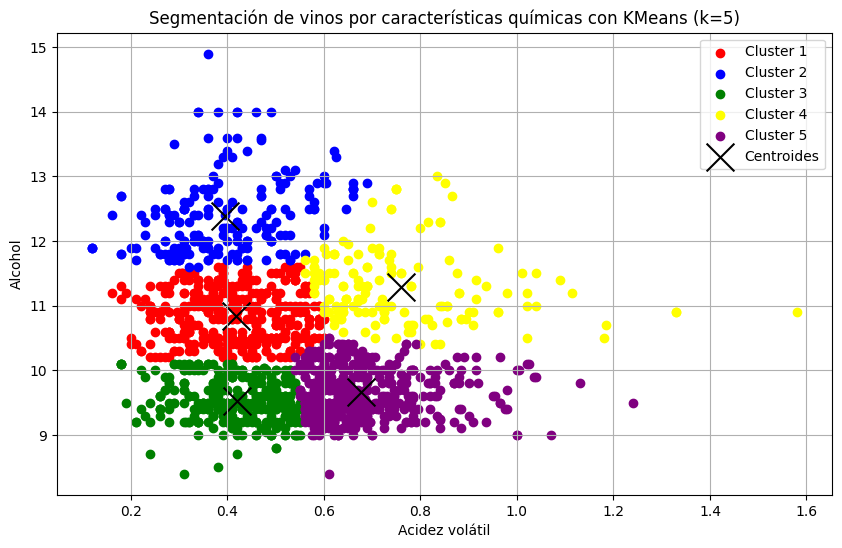

In [67]:
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Graficar los clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(
        df[df['Cluster'] == i]['volatile acidity'],
        df[df['Cluster'] == i]['alcohol'],
        c = colors[i],
        label = f'Cluster {i+1}'
    )

#Centroides 
centers = scaler.inverse_transform(kmeans.cluster_centers_) #Invertir
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, marker='x', label='Centroides')
plt.title('Segmentación de vinos por características químicas con KMeans (k=5)')
plt.xlabel('Acidez volátil')
plt.ylabel('Alcohol')
plt.legend()
plt.grid()
plt.show()
